# Getting started
You first homework assignemnt is designed to get you setup and started with GitHub and Jupyter notebooks, as well as get comfortable with running some basic levy walk simulations. 
  
**Note:** This repository will be where you post your homeworks and other assignments throughout the semester.

---
## Part 1: Setting up Github & Jupyter Notebooks

1. Setup a GitHub account and create a new repository with the following name:
    * <your\_last\_name>\_BIX\_F21
    * Add the users _coaxlab0_ (that’s a zero at the end) and _clappm_ as collaborators.

2. Clone the repository locally on your computer

3. Install jupyter notebooks on your computer. (Be sure it is integrated with at least Python 3.7)

4. Download this template notebook into your class repository

5. Push your Jupyter notebook to the repository you made on Github after saving and completing part 2.

---
## Part 2: Simple random walk simulations

Next you will run a few simulations to see how the different parameters on random walk (Gaussian vs. Levy) influence the behavior of the agents.

Fill out the code cells below to complete the assignment.  Most of the programming is extremely straight-forward, as it is all based on the code from the lab, which you can use/modify in this notebook.

### Install _explorationlib_

In [1]:
!pip install --upgrade git+https://github.com/parenthetical-e/explorationlib
!pip install --upgrade git+https://github.com/MattChanTK/gym-maze.git
!pip install celluloid # for the gifs

  Cloning https://github.com/parenthetical-e/explorationlib to /tmp/pip-req-build-7ygrafvk
  Running command git clone -q https://github.com/parenthetical-e/explorationlib /tmp/pip-req-build-7ygrafvk
  Created wheel for explorationlib: filename=explorationlib-0.0.1-py3-none-any.whl size=24681 sha256=da0070588b793dc75add78e426448b3b6c7ff8c170179e4f25785a8d8eedcad6
  Stored in directory: /tmp/pip-ephem-wheel-cache-usan0bz6/wheels/66/4e/7a/e9f6ae3eff8a06bc71faf2690450f976e9ae776c7a5a6486a4
Successfully built explorationlib
  Cloning https://github.com/MattChanTK/gym-maze.git to /tmp/pip-req-build-tut1ho7a
  Running command git clone -q https://github.com/MattChanTK/gym-maze.git /tmp/pip-req-build-tut1ho7a
     |████████████████████████████████| 11.8 MB 4.4 MB/s 
  Created wheel for gym-maze: filename=gym_maze-0.4-py3-none-any.whl size=14241 sha256=ad3f3f5580cb8ae68b95da688049cb6873375340186f6411823ea0f5441b9a74
  Stored in directory: /tmp/pip-ephem-wheel-cache-j6qze92v/wheels/01/f8/86/0dd

### Import modules

In [2]:
# from the standard library
import shutil
import glob
import os
import copy
import sys

# these are common to scientific programming in python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Computational experiments are run with 'experiment'
from explorationlib.run import experiment

# Here are some tools to select, save, and load
# data from computational experiments
from explorationlib.util import select_exp
from explorationlib.util import load
from explorationlib.util import save

# All the explorers we will play with are called
# "agents"; a bit of computer science jargon
from explorationlib.agent import Diffusion2d
from explorationlib.agent import Levy2d
from explorationlib.agent import TruncatedLevy2d

# The environments we will simulate live in a "gym"
from explorationlib.local_gym import Field
from explorationlib.local_gym import Bounded
from explorationlib.local_gym import Grid 
from explorationlib.local_gym import uniform_targets
from explorationlib.local_gym import constant_values

# A bunch of tools for plotting and for
# movie making
from explorationlib.plot import plot_position2d
from explorationlib.plot import plot_length_hist
from explorationlib.plot import plot_length
from explorationlib.plot import plot_targets2d
from explorationlib.plot import show_gif

# A couple metrics for scoring how well, or poorly,
# an exploration experiment went.
from explorationlib.score import search_efficiency
from explorationlib.score import total_reward
from explorationlib.score import first_reward

/usr/local/lib/python3.7/dist-packages/explorationlib/run.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


pygame 2.0.1 (SDL 2.0.14, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Additional notebook configuration

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.greedy=True

plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = "16"

## Section - Increasing Step Size

Run a batch of simulation with an increased step size (the baseline value is `0.1`).  The code for running these simulations will be essentially identical to the simulation code in the lab.

### Initialize and run the experiments

- set the parameters
- create the environment
- create the agents
- run the experiments

Feel free to create as many code cells as you would like.

In [38]:

# Setup
num_steps = 10000       # how many exploration steps in space?
num_experiments = 20    # we want to run ten experiments
detection_radius = 1

num_targets = 500

min_length = 0.1
step_size = 0.1  # Should be < (2 * detection_radius)

# Create env as an empty field
env = Field()

# Targets
target_boundary = (50, 50)
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1)
env.add_targets(targets, values, detection_radius=detection_radius)

# Create agents
diffusion = Diffusion2d(
    min_length=min_length, 
    scale=0.1, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

levy = Levy2d(min_length=min_length, 
    exponent=2, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

# experiments
levy_exp = experiment(
    f"levy_1", 
    levy, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
diffusion_exp = experiment(
    f"diffusion_1", 
    diffusion, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)

levy_1:   0%|          | 0/20 [00:00<?, ?it/s]

diffusion_1:   0%|          | 0/20 [00:00<?, ?it/s]

### Visualize the trajectories

Plot the trajectories taken by the agents

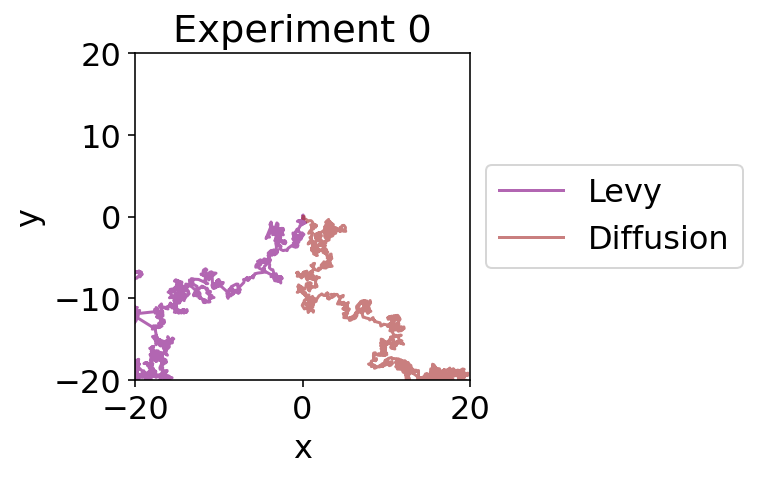

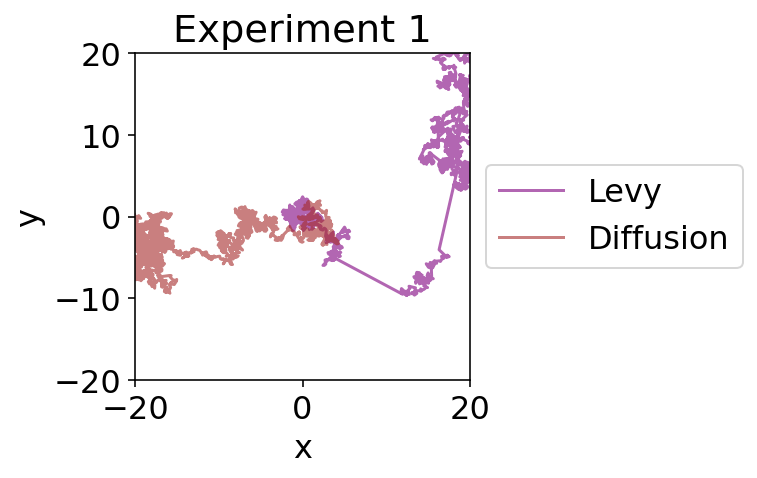

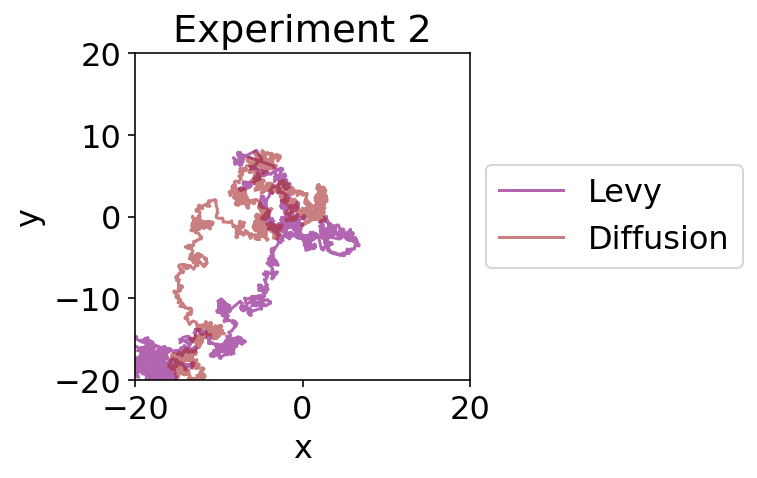

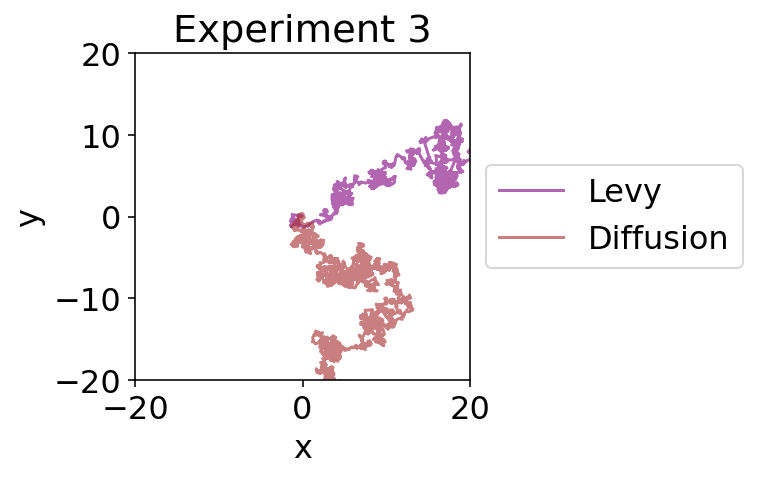

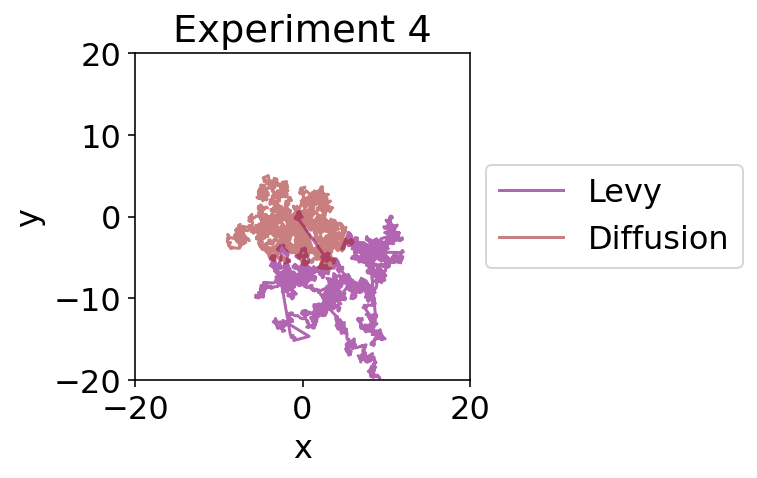

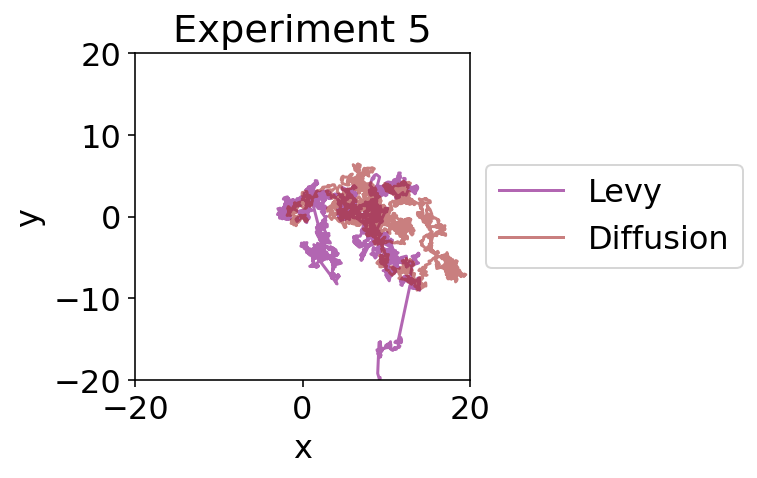

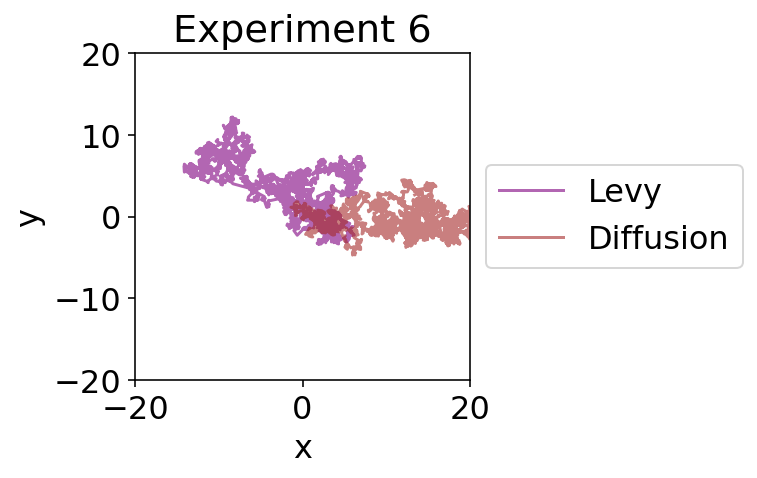

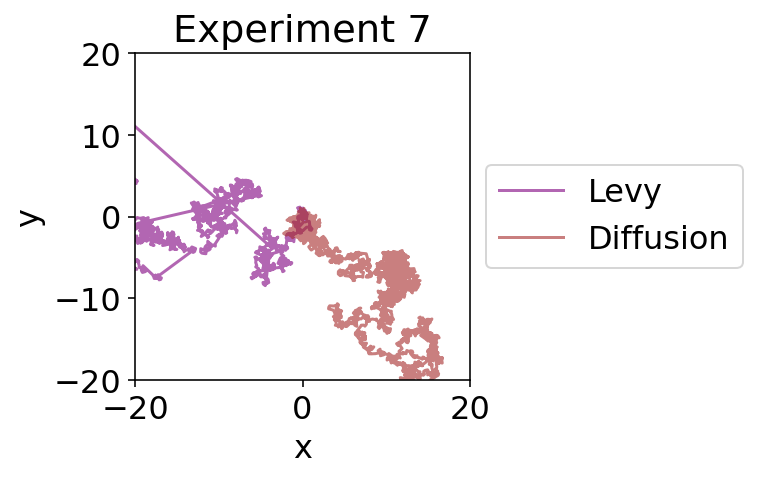

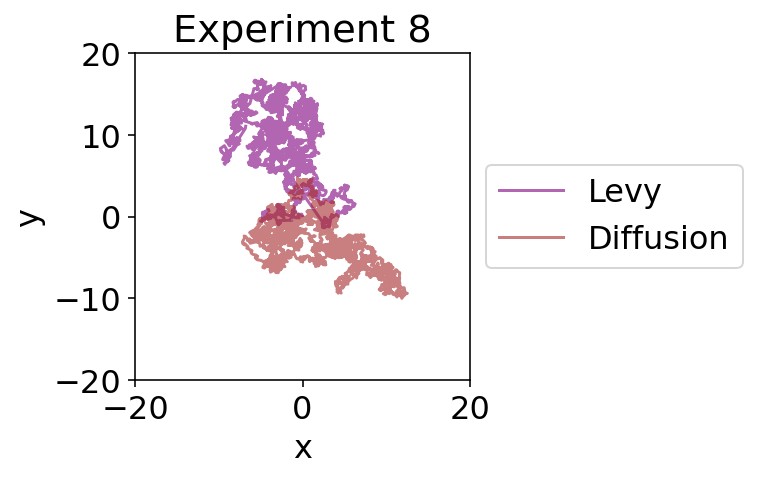

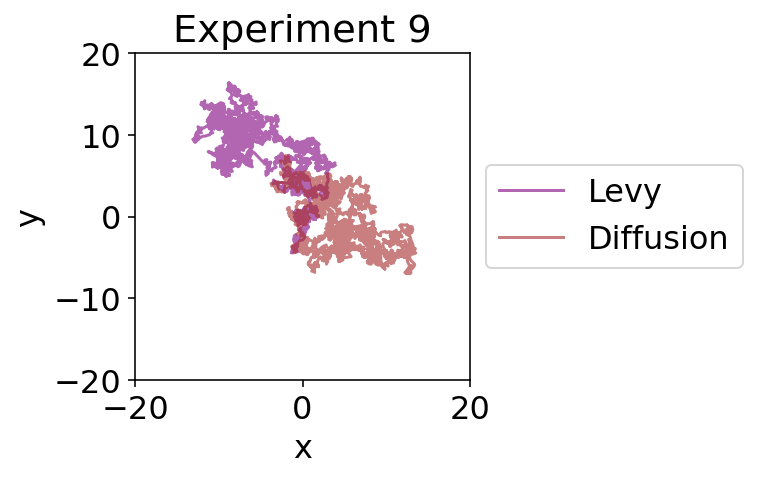

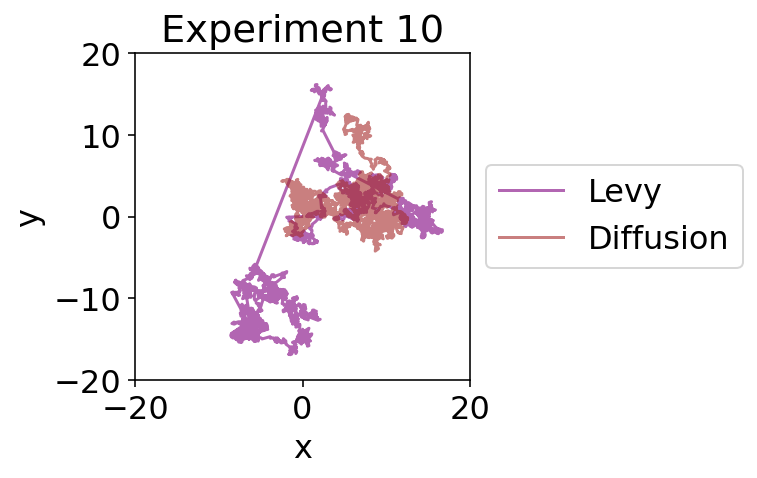

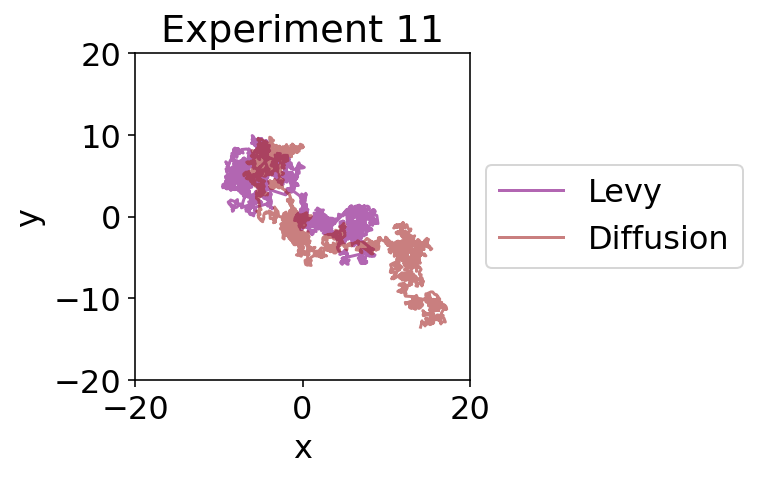

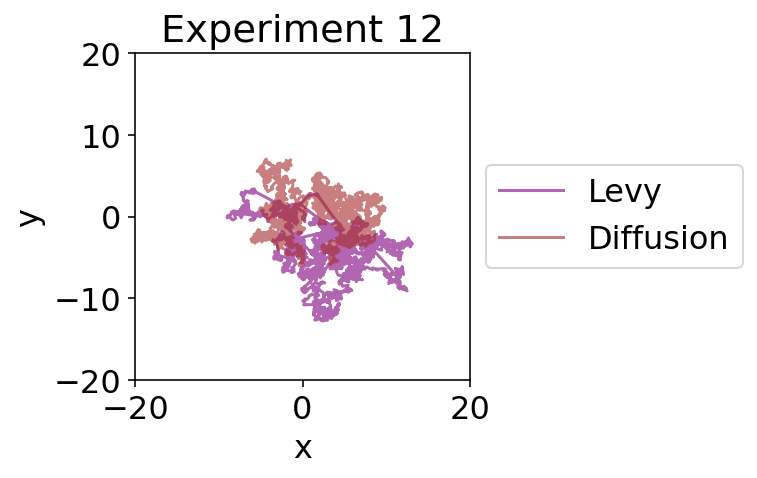

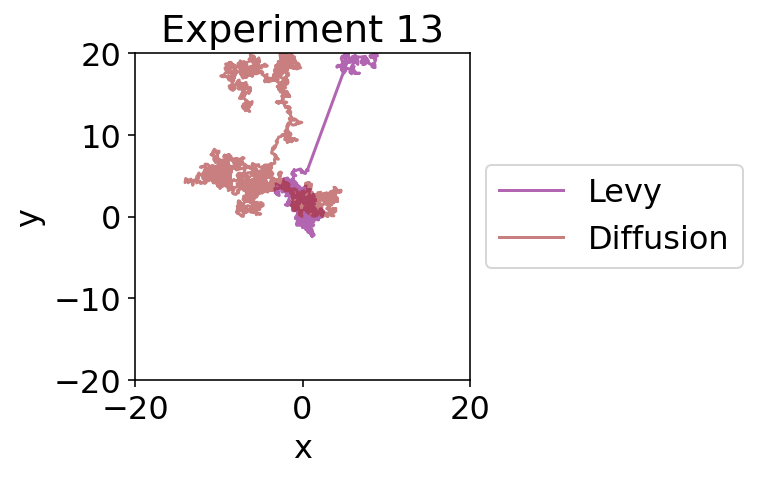

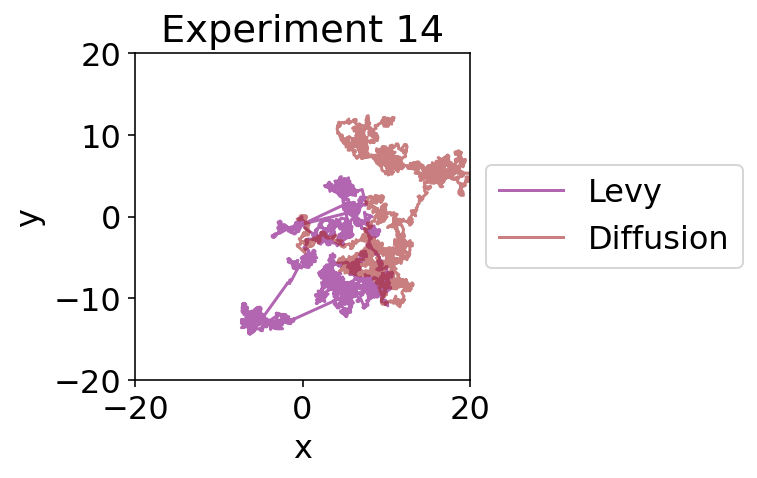

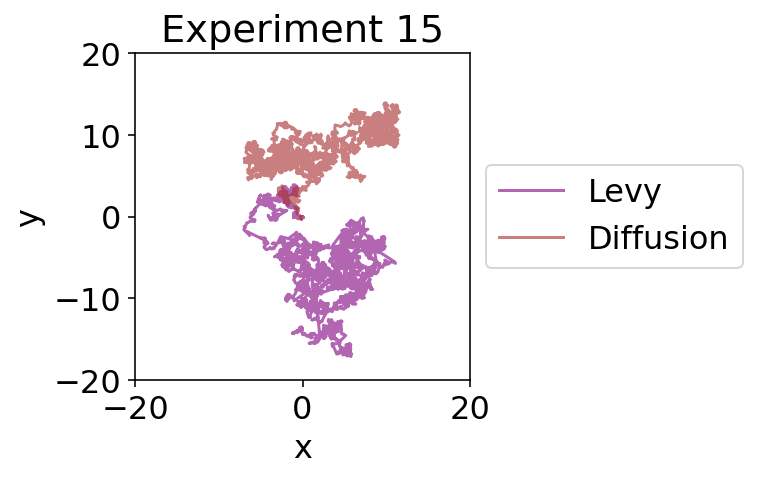

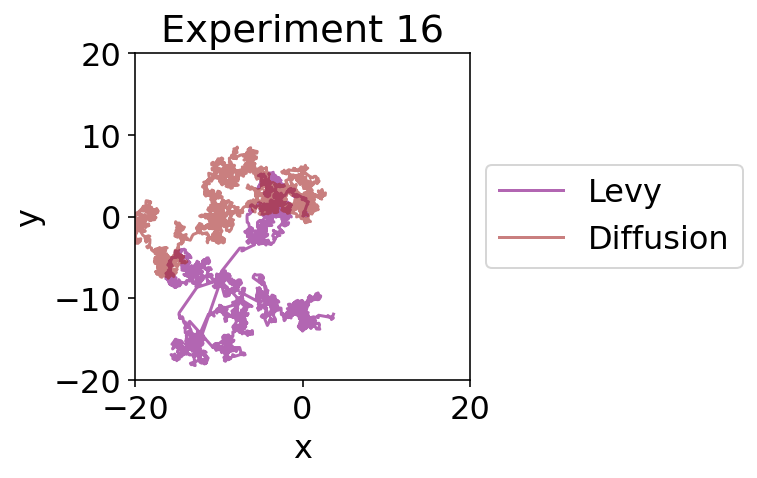

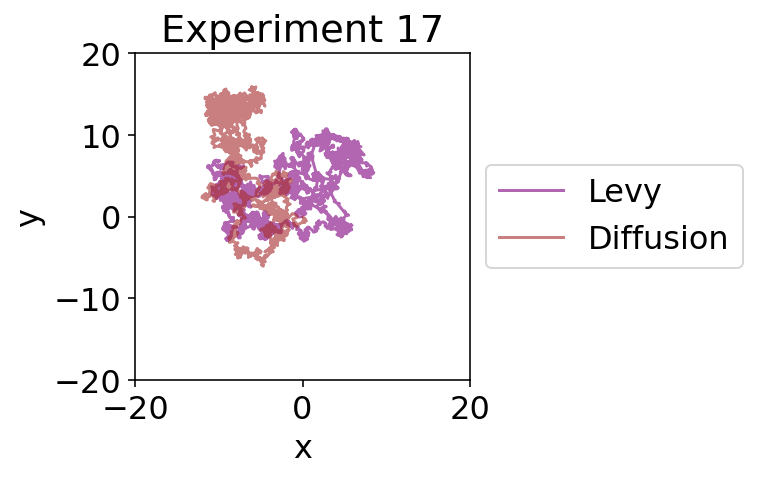

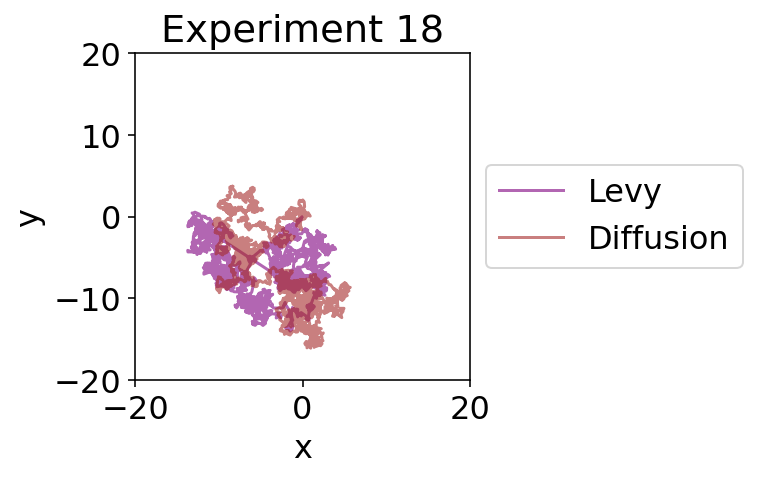

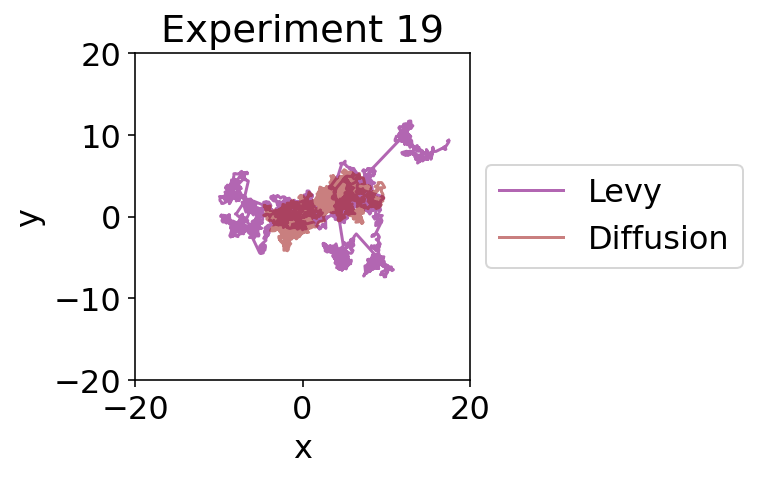

In [40]:
# View size
plot_boundary = (20, 20)

# Generate 10 plots of walking
for n in range(num_experiments):
    ax = None
    ax = plot_position2d(
        select_exp(levy_exp, n),
        boundary=plot_boundary,
        label=f"Levy",
        color="purple",
        alpha=0.6,
        ax=ax,
    )
    ax = plot_position2d(
        select_exp(diffusion_exp, n),
        boundary=plot_boundary,
        label=f"Diffusion",
        title=f"Experiment {n}",
        color="brown",
        alpha=0.6,
        ax=ax,
    )

### Question: How do these trajectories compare to those observed during the lab?  What effect did increasing the step size have?

Visually speaking, and the most simple way to describe the effect of increasing the step size, is to say that it adds a lot more "noise" to the simulations. With respect to the Levy search, at first I had noticed that incereasing the step size seems to significantly reduce those distinct long "jumps" (associated with Levy Flights) from one area to the next. Although not completely gone, it just seems that it's less prevelant. This observation is compounded by zooming out and increasing the boundaries for the plots as the original (20, 20) boundary doesn't capture the full visual simulation. 

Conversely, I was interested in seeing what would happen if we decreased the step size and it appears that it has an opposite effect. By decreasing the step size 10 fold, almost all of the simulations exhibited those distinct long lines or jumps associated with Levy Flights. 


## Section - Increasing Detection Radius

Run a batch of simulation with an increased detection radius (the baseline value is `1`).

### Initialize and run the experiments

- set the parameters
- create the environment
- create the agents
- run the experiments

Feel free to create as many code cells as you would like.

In [41]:
# Setup
num_steps = 10000       # how many exploration steps in space?
num_experiments = 20    # we want to run ten experiments
detection_radius = 200

num_targets = 500

min_length = 0.1
step_size = 0.1  # Should be < (2 * detection_radius)

# Create env as an empty field
env = Field()

# Targets
target_boundary = (50, 50)
targets = uniform_targets(num_targets, target_boundary)
values = constant_values(targets, 1)
env.add_targets(targets, values, detection_radius=detection_radius)

# Create agents
diffusion = Diffusion2d(
    min_length=min_length, 
    scale=0.1, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

levy = Levy2d(min_length=min_length, 
    exponent=2, 
    detection_radius=detection_radius, 
    step_size=step_size,
)

# experiments
levy_exp = experiment(
    f"levy_1", 
    levy, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)
diffusion_exp = experiment(
    f"diffusion_1", 
    diffusion, 
    env, 
    num_steps=num_steps, 
    num_experiments=num_experiments,
    seed=59393,
    dump=False,
)

levy_1:   0%|          | 0/20 [00:00<?, ?it/s]

diffusion_1:   0%|          | 0/20 [00:00<?, ?it/s]

### Visualize the average reward

Plot the average reward values acheived by each of the agents

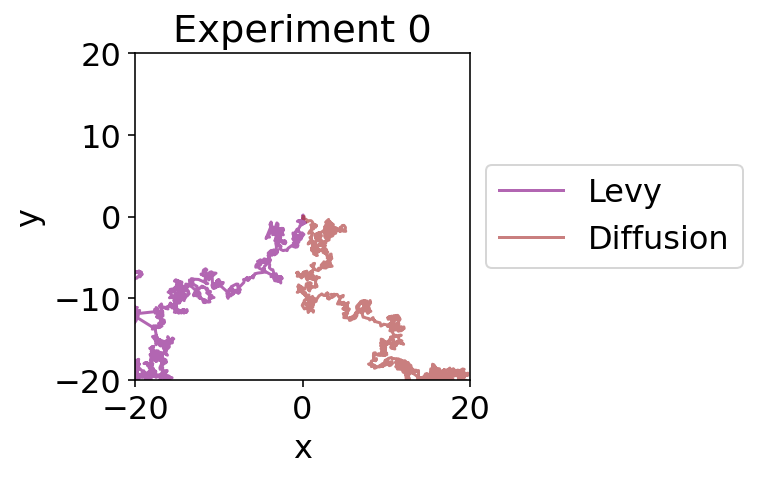

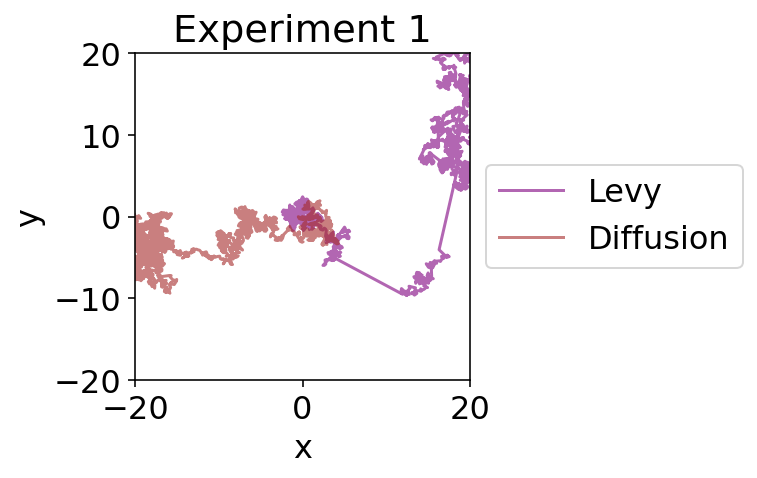

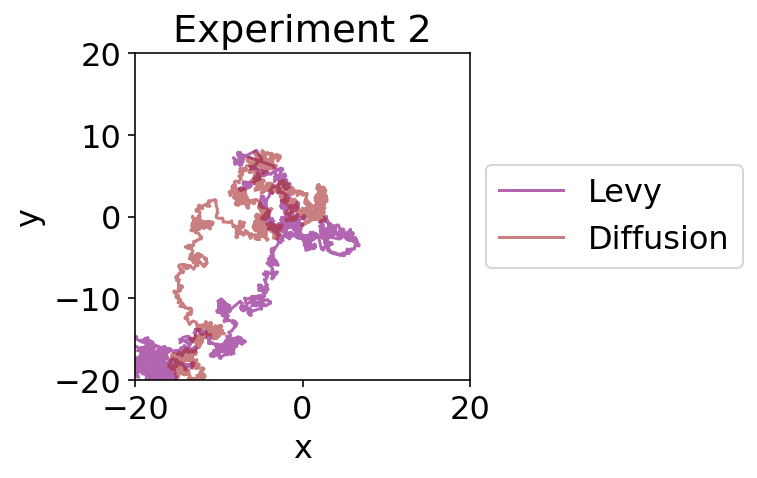

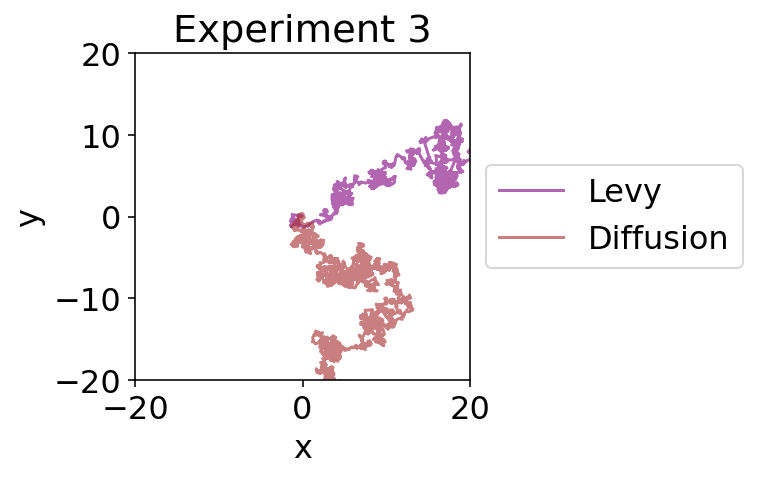

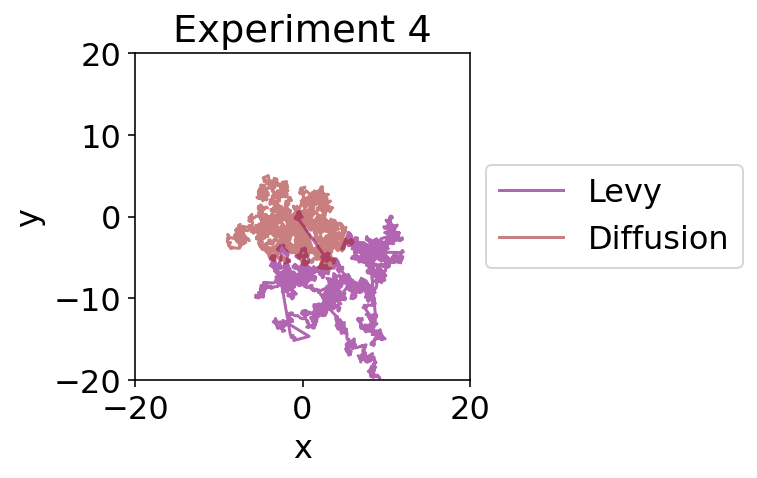

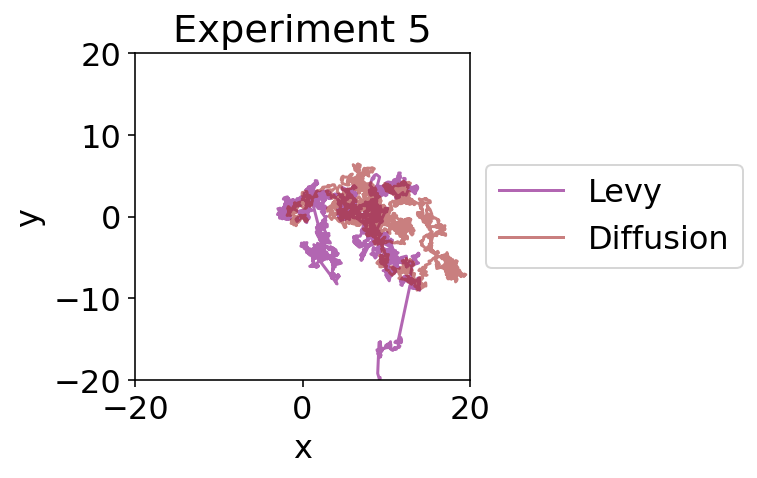

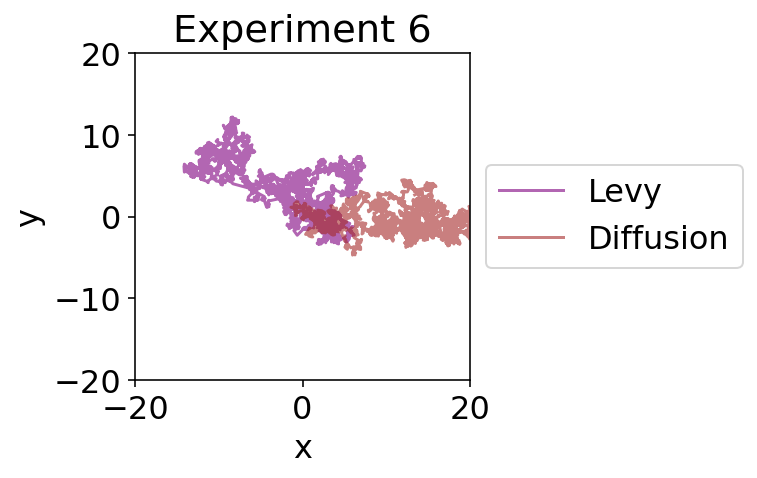

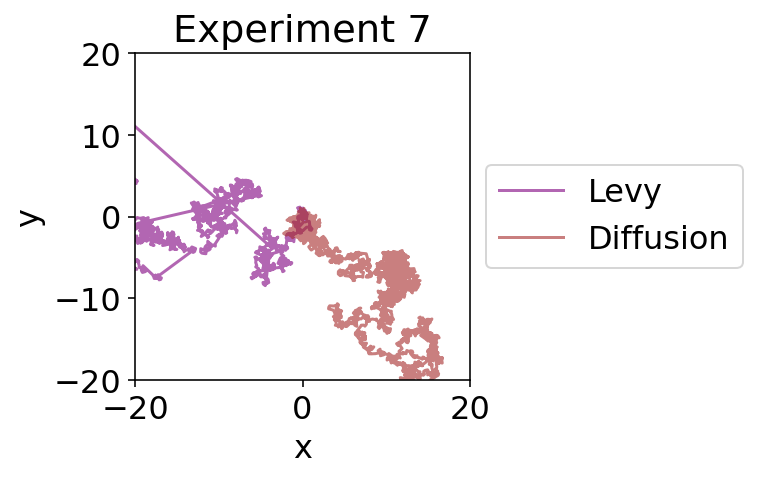

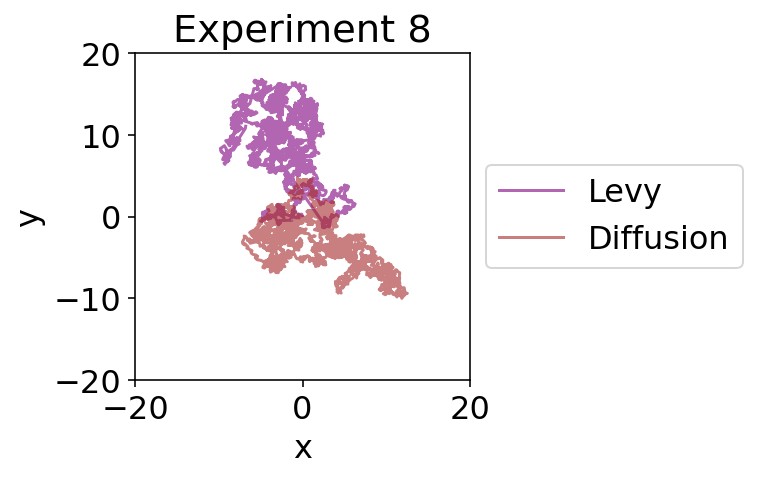

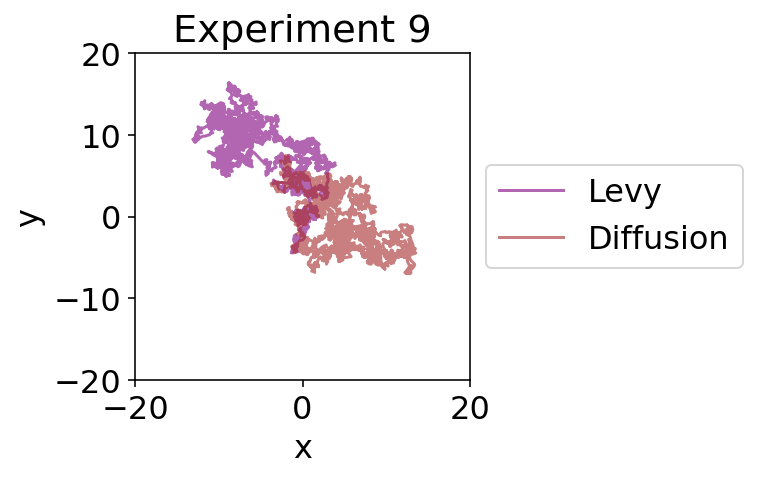

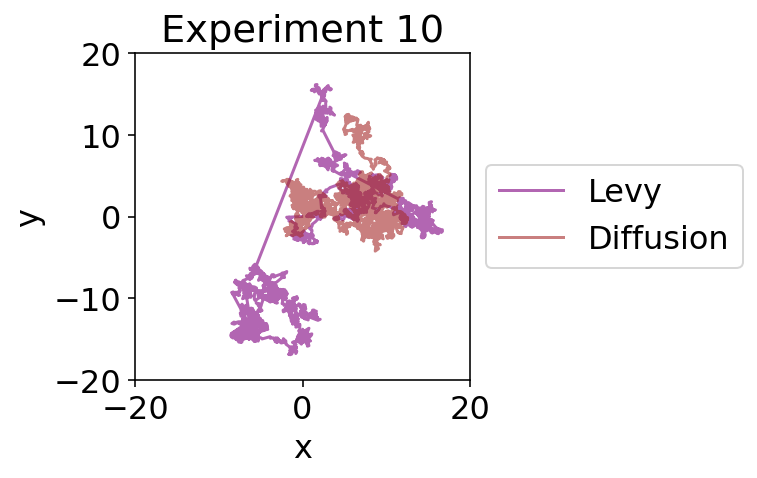

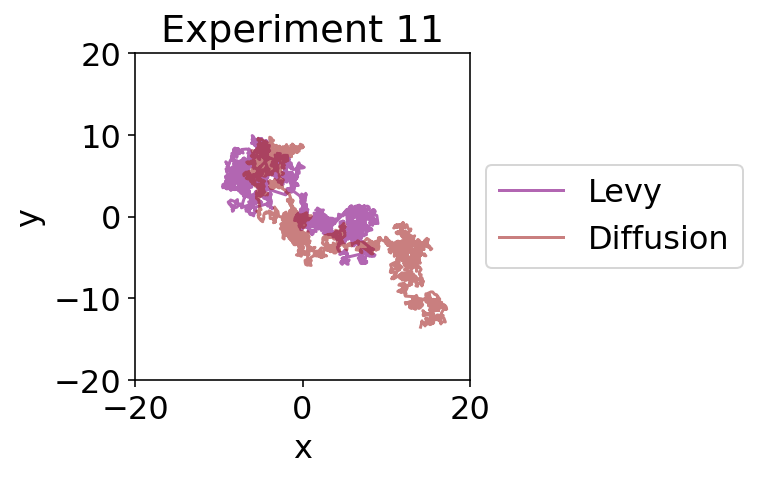

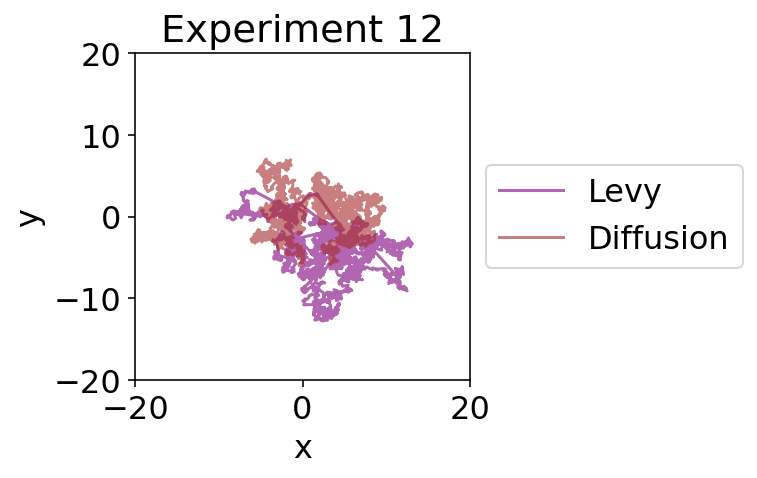

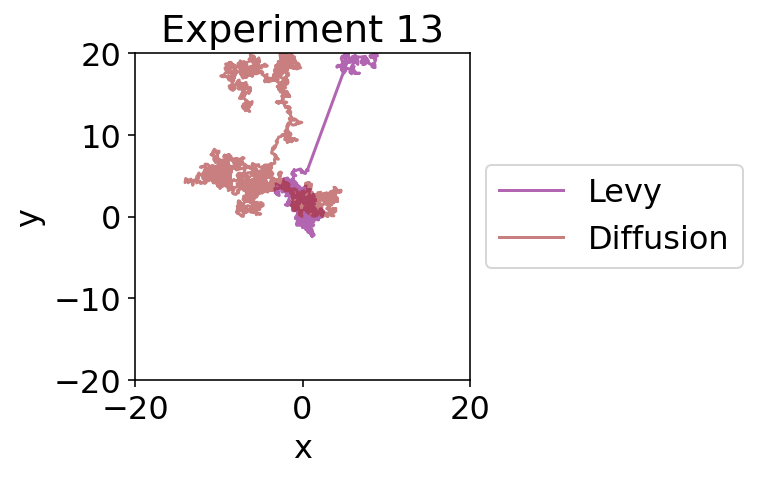

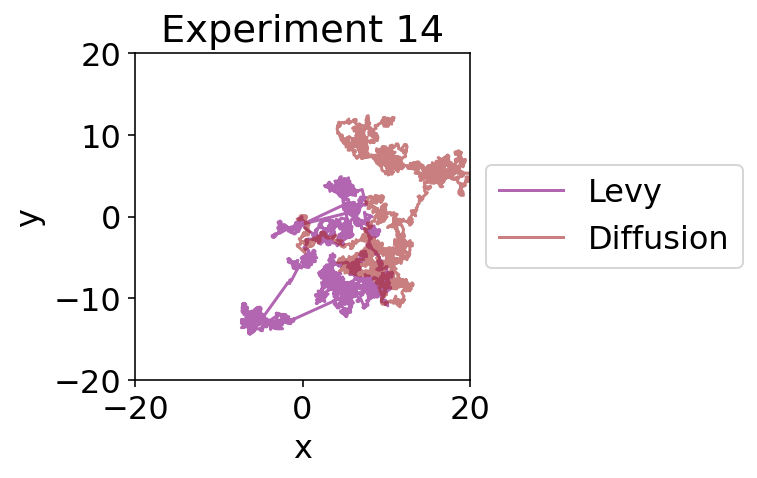

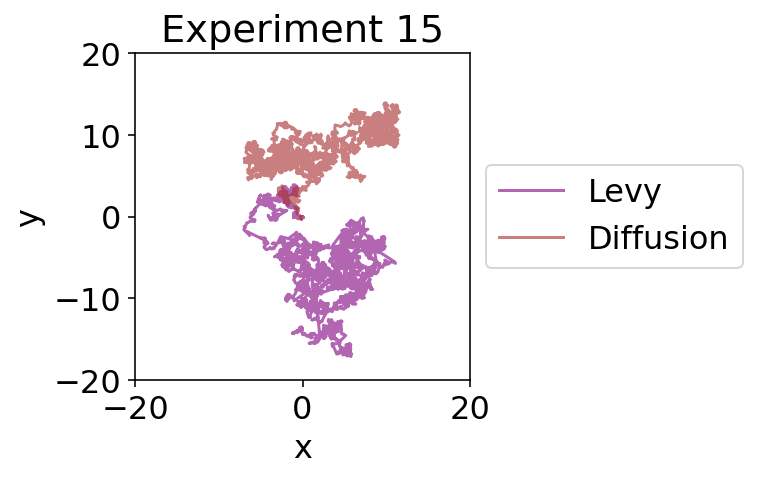

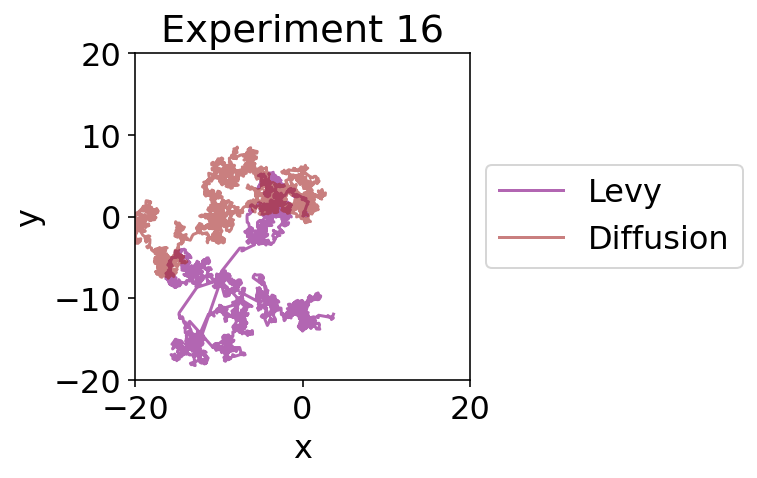

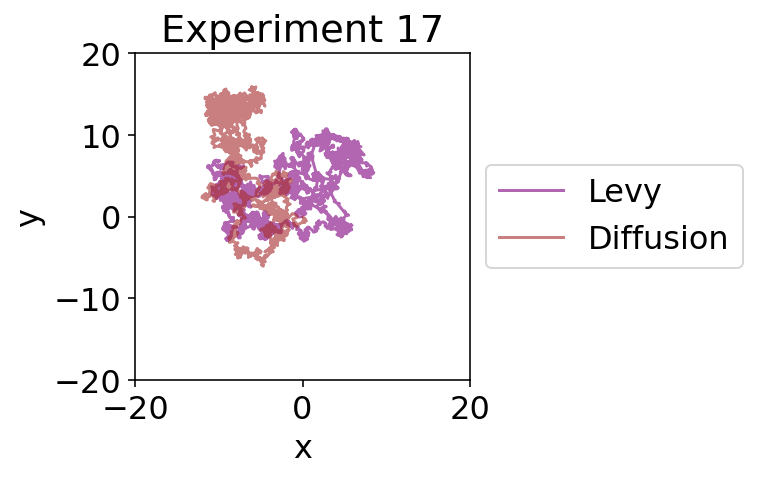

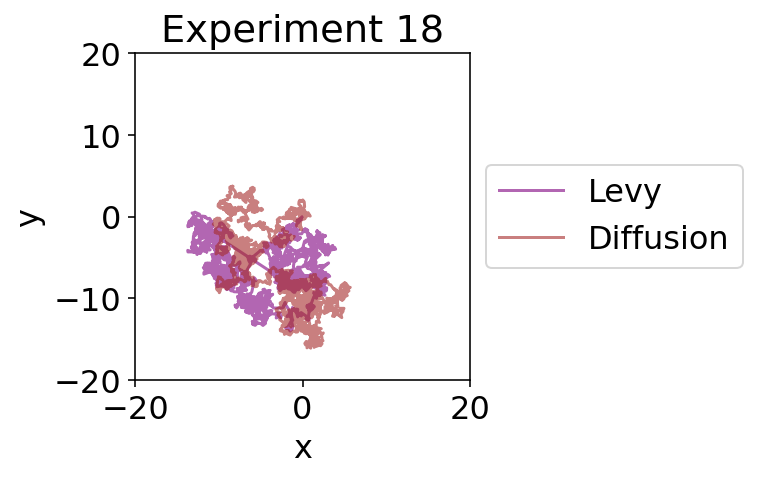

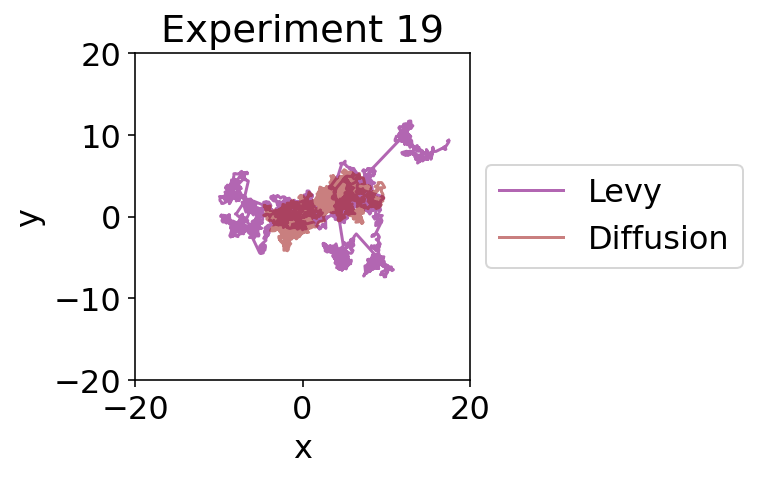

In [42]:
# View size
plot_boundary = (20, 20)

# Generate 10 plots of walking
for n in range(num_experiments):
    ax = None
    ax = plot_position2d(
        select_exp(levy_exp, n),
        boundary=plot_boundary,
        label=f"Levy",
        color="purple",
        alpha=0.6,
        ax=ax,
    )
    ax = plot_position2d(
        select_exp(diffusion_exp, n),
        boundary=plot_boundary,
        label=f"Diffusion",
        title=f"Experiment {n}",
        color="brown",
        alpha=0.6,
        ax=ax,
    )

### Question: How do these average reward values compare to those observed during the lab? What effect did increasing the detection radius have?

This one is a little bit more tough, visually speaking. Of the 20 simulations I plotted, a lot of them exhibted that distinct Levy flight line (Similar to the lab). Now I don't want to blanket statement all of the simulations, but generally speaking, it appears that increasing the dectection radius makes the simulations a lot more centralized. For example, there's a lot more overlap between Levy and Diffusion specifically in the central region of the plots. This is sort of intuitive since increasing the dection of "food" means that we won't have to travel in as many directions and it makes the search more efficient. Again, I don't want to generalize all of the simulations as some of them still exhibit that long traveling to a different regions of the plot, but if I were to take away anything from increasing the detection radius it would be what I've outlined above. 

**DUE:** 5pm EST, Sept 23, 2021. Email the link to the completed notebook on your Github repository to the TA and me via Canvas.

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
N/A
